In [120]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [122]:
#pd.read_csv('https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv')
path=r"C:\Users\soniy\OneDrive\Desktop\happiness_score_dataset.csv"
df=pd.read_csv(path)

In [123]:
type(df)

pandas.core.frame.DataFrame

In [124]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [125]:
data_columns=['Country','Region','Happiness Rank','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [126]:
data= data_columns.copy()

In [127]:
happy_df= df.rename({'Country':'Country','Region':'Region','Happiness Rank':'Happiness Rank','Economy (GDP per Capita)':'Economy (GDP per Capita)','Family':'Family','Health (Life Expectancy)':'Health (Life Expectancy)','Freedom':'Freedom','Trust (Government Corruption)':'Trust (Government Corruption)','Generosity':'Generosity','Dystopia Residual':'Dystopia Residual'})

In [128]:
happy_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Text(0, 0.5, 'GDP per Capita')

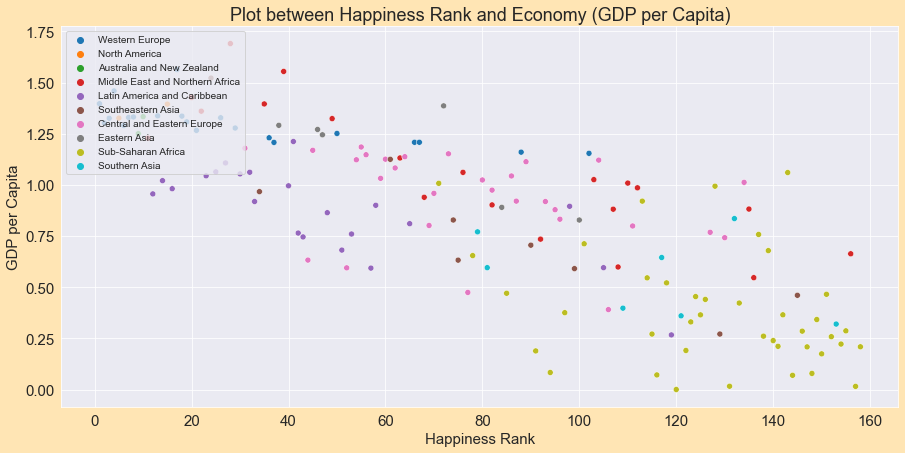

In [129]:
#plot b/w happiness and GDP 
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Rank and Economy (GDP per Capita)')
sns.scatterplot(x= happy_df['Happiness Rank'],y=happy_df['Economy (GDP per Capita)'],hue=happy_df['Region'])
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Rank')
plt.ylabel('GDP per Capita')

In [130]:
gdp_regions=happy_df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_regions

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

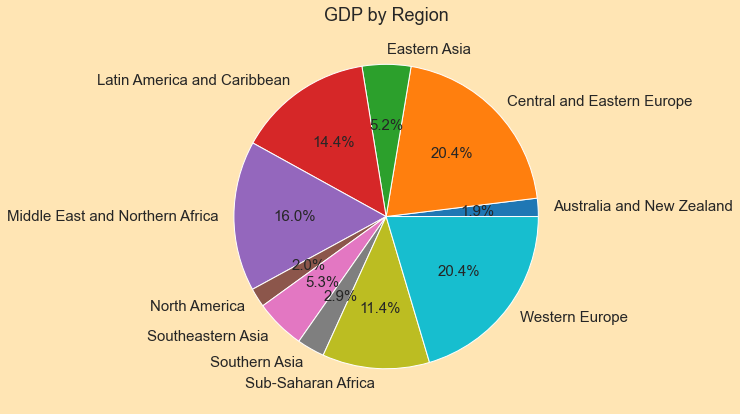

In [131]:
gdp_regions.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [132]:
#Total countries 

total_country=happy_df.groupby('Region')['Country'].count()
print(total_country)

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64


C:\Users\soniy\AppData\Local\Temp\ipykernel_14124\3995936936.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)


<AxesSubplot:>

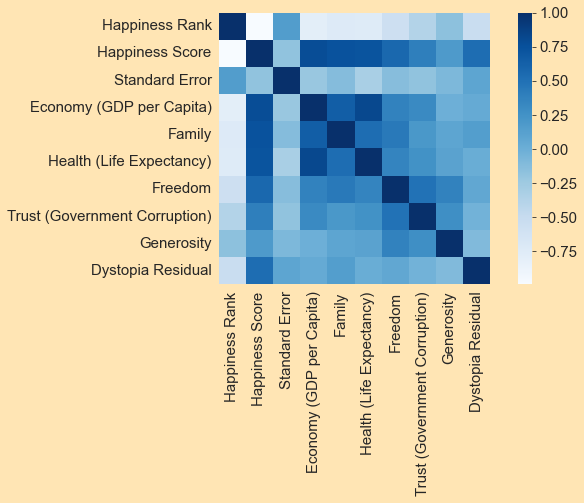

In [133]:
#Correlation Map

cor=happy_df.corr(method="pearson")
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap="Blues",square=True,ax=ax)

In [134]:
#corruption in regionals
#Average corruption
corruption=happy_df.groupby('Region')['Trust (Government Corruption)'].mean()
corruption

Region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Trust (Government Corruption), dtype: float64

<BarContainer object of 158 artists>

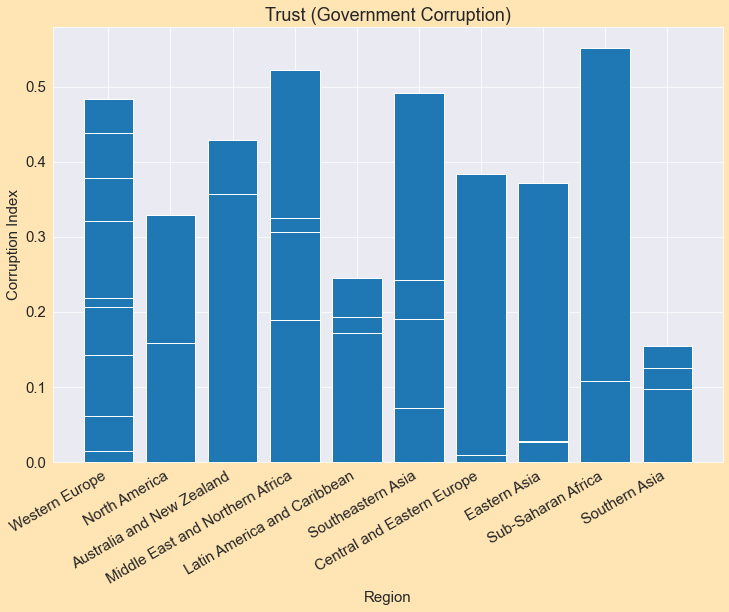

In [135]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Trust (Government Corruption)')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Corruption Index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar( df['Region'],df['Trust (Government Corruption)'])

In [136]:
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)

C:\Users\soniy\AppData\Local\Temp\ipykernel_14124\1272576241.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\soniy\AppData\Local\Temp\ipykernel_14124\1272576241.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Health (Life Expectancy)')

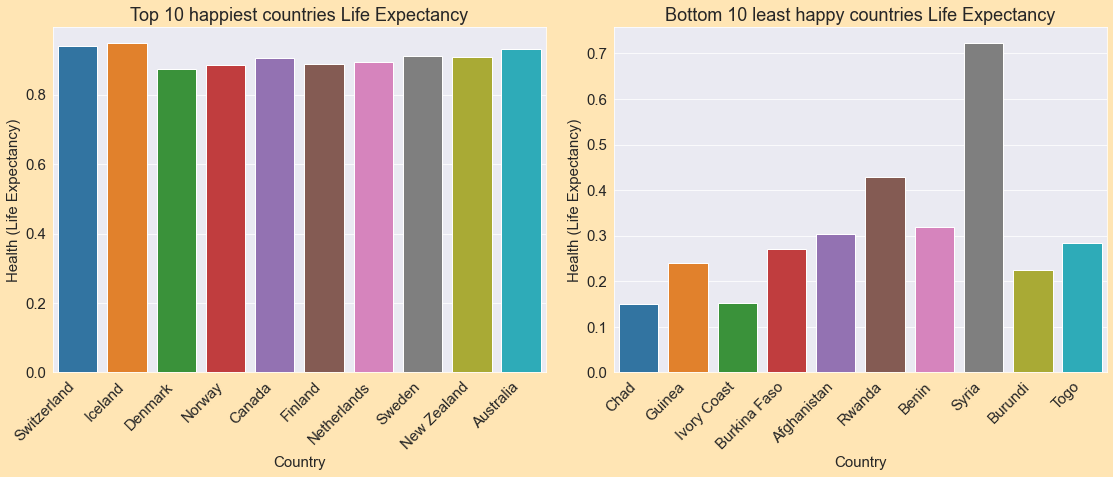

In [137]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10['Country'],y=top_10['Health (Life Expectancy)'],ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Health (Life Expectancy)')

xlabels=bottom_10.Country
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10['Country'],y=bottom_10['Health (Life Expectancy)'],ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Health (Life Expectancy)') 

Text(0, 0.5, 'Happiness Score')

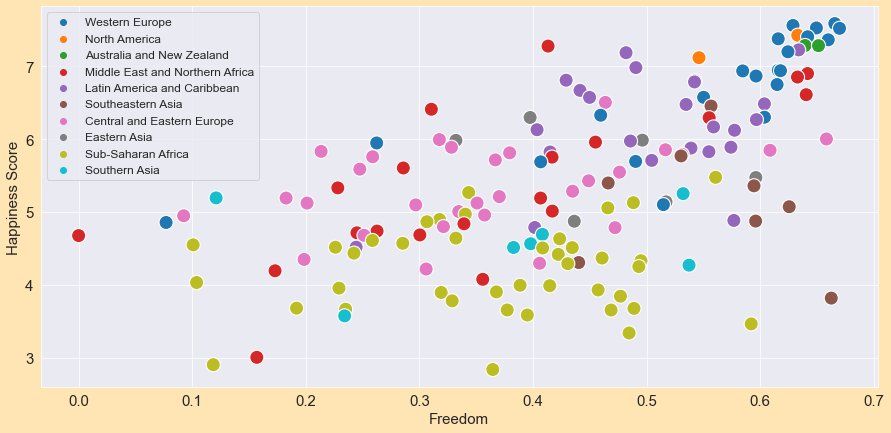

In [138]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x= happy_df['Freedom'],y=happy_df['Happiness Score'],hue=happy_df['Region'],s=200)
plt.legend(loc='upper left',fontsize='12')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

C:\Users\soniy\AppData\Local\Temp\ipykernel_14124\1090658088.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\soniy\AppData\Local\Temp\ipykernel_14124\1090658088.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Trust (Government Corruption)')

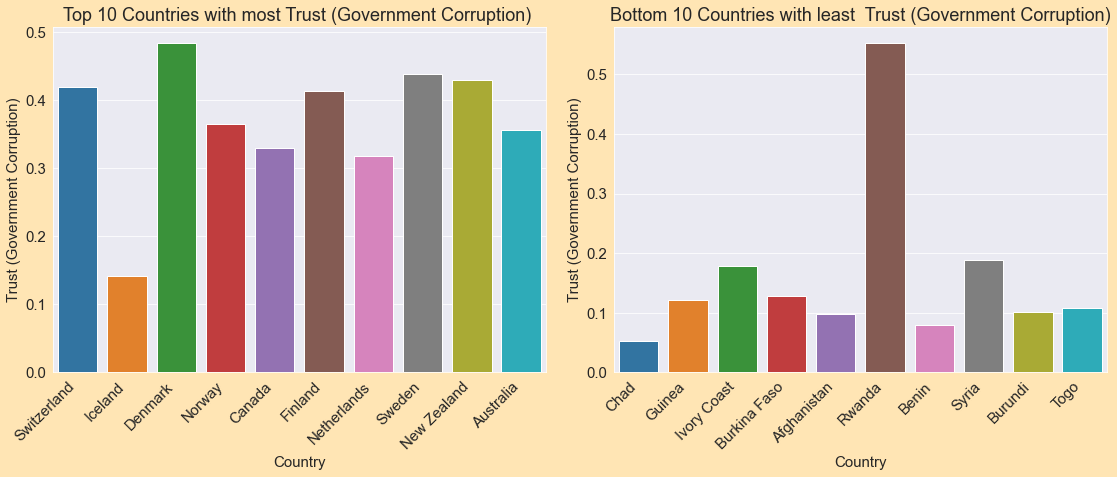

In [149]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.Country
axes[0].set_title('Top 10 Countries with most Trust (Government Corruption) ')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10['Country'],y=top_10['Trust (Government Corruption)'],ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Trust (Government Corruption)')

xlabels=bottom_10.Country
axes[1].set_title('Bottom 10 Countries with least  Trust (Government Corruption)')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10['Country'],y=bottom_10['Trust (Government Corruption)'],ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Trust (Government Corruption)') 

Text(0, 0.5, 'Trust (Government Corruption)')

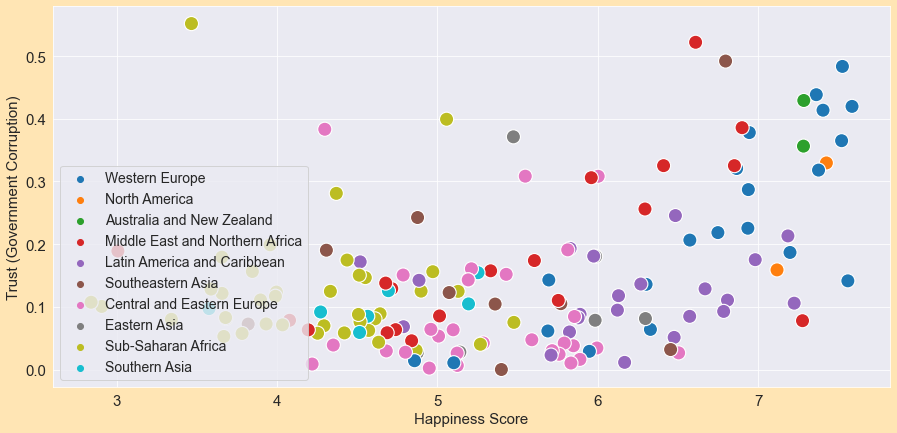

In [151]:
#corruption vs happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x= happy_df['Happiness Score'],y=happy_df['Trust (Government Corruption)'],hue=happy_df['Region'],s=200)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')